In [1]:
import struct
import numpy as np
from sklearn.metrics import accuracy_score
from math import exp
from sklearn.model_selection import train_test_split as split_
from random import seed
from sklearn import  metrics
import itertools
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import keras 
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import ELU, PReLU, LeakyReLU


In [2]:

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [3]:

x_train.shape

(50000, 32, 32, 3)

In [4]:
y_test.shape

(10000, 1)

In [5]:
x_train = np.delete(x_train , np.where(y_train > 1) , axis = 0)
y_train = np.delete(y_train , np.where(y_train > 1) , axis = 0)

In [6]:
x_test = np.delete(x_test , np.where(y_test > 1) , axis = 0)
y_test = np.delete(y_test , np.where(y_test > 1) , axis = 0)

In [7]:
x_train.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape

(10000, 1)

In [9]:
x_test.shape


(2000, 32, 32, 3)

In [10]:
y_test.shape

(2000, 1)

In [11]:
print(x_test.shape)
print(x_train.shape)

(2000, 32, 32, 3)
(10000, 32, 32, 3)


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='elu', strides=(1,1),padding='same',input_shape=(32,32,3)))
model.add(layers.Conv2D(8, (3, 3), activation='elu', strides=(1,1),padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(8, (3, 3), activation='elu', strides=(1,1),padding='same'))
model.add(layers.Conv2D(8, (3, 3), strides=1 ,padding='same', activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(8, (3, 3), activation='elu',padding='same', strides=(1,1)))
model.add(layers.Conv2D(8, (3, 3), activation='elu',padding='same', strides=(1,1)))
model.add(layers.Conv2D(8, (3, 3), activation='elu',padding='same', strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(8, (3, 3), activation='elu',padding='same', strides=(1,1)))
model.add(layers.Conv2D(8, (3, 3), activation='elu',padding='same', strides=(1,1)))
model.add(layers.Conv2D(8, (3, 3), activation='elu',padding='same', strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))



model.add(layers.Conv2D(8, (3, 3), activation='elu',padding='same', strides=(1,1)))
model.add(layers.Conv2D(8, (3, 3), activation='elu',padding='same', strides=(1,1)))
model.add(layers.Conv2D(8, (3, 3), activation='elu',padding='same', strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))


In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 8)         584       
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 8)         584       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                    

In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='elu'))
model.add(layers.Dense(128, activation='elu'))
model.add(layers.Dense(64, activation='elu'))
model.add(layers.Dense(2, activation='softmax'))

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 8)         584       
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 8)         584       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                    

In [16]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])#===========================================^ equal True

history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test),batch_size=250)

Epoch 1/5
40/40 [==============================] - 17s 20ms/step - loss: 0.6830 - accuracy: 0.6275 - val_loss: 0.4637 - val_accuracy: 0.7890
Epoch 2/5
40/40 [==============================] - 0s 11ms/step - loss: 0.3978 - accuracy: 0.8258 - val_loss: 0.3192 - val_accuracy: 0.8645
Epoch 3/5
40/40 [==============================] - 0s 12ms/step - loss: 0.4171 - accuracy: 0.8233 - val_loss: 0.3583 - val_accuracy: 0.8560
Epoch 4/5
40/40 [==============================] - 0s 10ms/step - loss: 0.3472 - accuracy: 0.8503 - val_loss: 0.2691 - val_accuracy: 0.8885
Epoch 5/5
40/40 [==============================] - 0s 11ms/step - loss: 0.2856 - accuracy: 0.8836 - val_loss: 0.2589 - val_accuracy: 0.9040


63/63 - 1s - loss: 0.2589 - accuracy: 0.9040 - 660ms/epoch - 10ms/step


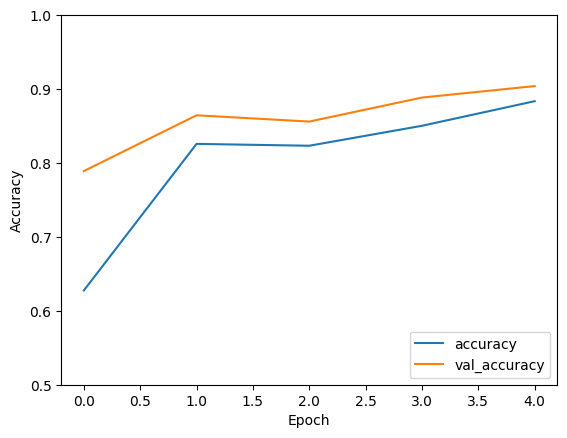

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [18]:
print(test_acc)


0.9039999842643738
